# Data science assignment 
Monalisa, who is a Life sciences researcher does Pharmacovigilance (post-market drug safety surveillance) for Pharma Products.
Pharmacovigilance identifies ADRs (adverse drug reactions) after a drug’s release. Comprehensive knowledge of ADRs can reduce the detrimental impact on patient’s health system. Practically, clinical trials cannot investigate all settings in which a drug will be used, making it impossible to fully characterize the drug’s adverse effect profile before its approval. Pharmacovigilance methods continuously analyse frequently updated data sources, Twitter in particularly because of its large user base, demographic variability, and publicly available data.
ADR detection in social media requires automated methods to process the high data volume. It would greatly help her if she is able to automate the segmentation of Tweet into either ADR or NON-ADR, on the basis of Drug, Symptom and Effect mentioned in future.
My Job is to Classify the Tweet into the 2 segments.

**Dataset** 

Data set has given to me consist has tweets labelled as ADR and NON-ADR. The file has information which contains column like user IDs, tweet IDs, and label along with the tweet.

# My Approch to solution-:
The features available in text format so this is problem of Text classification(Binary classification Problem).I used Nltk
library to perform Text analytic.
These are steps I have taken to build this text classification model.
- 1.Import the Useful Library such as Pandas,Nltk,Sklearn etc.
- 2.import the dataset using Pandas library and checked the data information,Null values,shape of data,value counts etc.
- 3.Selected the independent variable and dependent Variable and check the value counts of INDEPENDENT VARIABLE found that data set is very Imbalanced.
- 4.Used Upsampling methods to balanced the dataset .
- 5.**Text preprocessing** like Removing punctuations, special characters, extra spaces, stopwords,Normalization techniques such as Stemming and Lemmatization to to normalize the text.
- 6.**Text vectorization** 
- I have tried 3 methods of vectorization of text like n_gram vectorization, word_count vectorization and tfidf vectorization.
- 7.**Model building & ModelEvaluation**
- I have Splits the data into train test split into 75:25 ratio and Tried different different models Like 
- **LOGISTIC REGRESSION,**,RANDOM FOREST **afer using different different moels I found that **LOGISTIC REGRESSION IS THE BEST PERFORMING MODEL AMONGST ALL WITH 90.34% ACCURACY**
-  To imporve the model perfromance we can use ensemble learning algorthims like Adaboost classifier,Gradient boosting etc with hyperparameter tuning using Grid search CV etc.



In [1]:
#  Importing the Useful Library which might be useful throughout the model.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk 
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score,f1_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier


In [19]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [2]:
# Import the  dataset
df= pd.read_csv('data.csv')
df

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1
...,...,...,...,...
23511,17921794,146275,"At autopsy, the liver was found to be small, s...",0
23512,17921794,375409,"Physical exam revealed a patient with aphasia,...",0
23513,17921794,246581,At the time when the leukemia appeared seven o...,0
23514,17921794,534599,The American Society for Regional Anesthesia a...,0


In [3]:
#Cheking the initial 5 rows of the dataset
df.head()

,UserId,TweetId,Tweet,ADR_label
0,10030778,413205,Intravenous azithromycin-induced ototoxicity.,1
1,10048291,528244,"Immobilization, while Paget's bone disease was...",1
2,10048291,361834,Unaccountable severe hypercalcemia in a patien...,1
3,10082597,292240,METHODS: We report two cases of pseudoporphyri...,1
4,10082597,467101,METHODS: We report two cases of pseudoporphyri...,1


In [4]:
df.shape #Checking the shape of Dataset

(23516, 4)

In [5]:
df.info() #Checking the Information of data like Data type of different features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23516 entries, 0 to 23515
Data columns (total 4 columns):
UserId       23516 non-null int64
TweetId      23516 non-null int64
Tweet        23516 non-null object
ADR_label    23516 non-null int64
dtypes: int64(3), object(1)
memory usage: 735.0+ KB


In [6]:
df.isnull().sum() #Cheked the Null values and find there is a No null NULL values in data

UserId       0
TweetId      0
Tweet        0
ADR_label    0
dtype: int64

In [7]:
df.nunique()

UserId        1644
TweetId      23202
Tweet        20896
ADR_label        2
dtype: int64

In [8]:
df['ADR_label'].value_counts()

0    16694
1     6822
Name: ADR_label, dtype: int64

In [9]:
x=df['Tweet'] 
y=df['ADR_label']  #Target variable
x.shape,y.shape

((23516,), (23516,))

In [10]:
y.value_counts() #Clearly Data set is imbalanced 

0    16694
1     6822
Name: ADR_label, dtype: int64

In [11]:
#Balancing the dataset using upsampling technique
from sklearn.utils import resample
df_majority_class = df[df.ADR_label==0]
df_minority_class = df[df.ADR_label==1]
df_minority_upsampled = resample(df_minority_class, 
                                 replace=True,  
                                 n_samples=16624,   
                                 random_state=123)
 

df_upsampled = pd.concat([df_majority_class, df_minority_upsampled])
 

df_upsampled.ADR_label.value_counts()

0    16694
1    16624
Name: ADR_label, dtype: int64

# Text Preprocessing

In [12]:
cleaned_tweet = []
for tweet in list(x):
    tweet_clean = re.compile("[.;:!\'?,\"()\[\]\r\n]").sub("",tweet.lower())
    cleaned_tweet.append(tweet_clean)

In [13]:
#Removing the stopwords 
english_stop_words = stopwords.words('english')
def stop_words(corpus):
    stop_words_removal = []
    for tweet in corpus:
        stop_words_removal.append(' '.join([word for word in tweet.split() if word not in english_stop_words]))     
    return stop_words_removal

tweets_stopwords = stop_words(cleaned_tweet)

In [17]:
#Stemmizing the text
def get_stemmed_text(corpus):
    stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in tweet.split()]) for tweet in corpus]

stemmed_tweets = get_stemmed_text(tweets_stopwords)

In [18]:
#Lemmatizing the tweet
def get_lemmatized_text(corpus):
    lemmatizer = WordNetLemmatizer()
    return [' '.join([lemmatizer.lemmatize(word) for word in tweet.split()]) for tweet in corpus]

lemmatized_tweets = get_lemmatized_text(tweets_stopwords)

# Text Vectorization

In [20]:
# Creating n-gram vectorized data using countvectorizer
ngram_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2))
ngram_vectorizer.fit(lemmatized_tweets)
X_ngram = ngram_vectorizer.transform(lemmatized_tweets)


In [21]:

x_train, x_test, y_train, y_test = train_test_split(X_ngram, y, train_size = 0.75)

# Model building

In [22]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler

In [24]:
LR=LogisticRegression()
RFC=RandomForestClassifier()


C:\Users\Travealone\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 0.9030447354992346
f1 Score 0.8255813953488372
[[3960  189]
 [ 381 1349]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4149
           1       0.88      0.78      0.83      1730

    accuracy                           0.90      5879
   macro avg       0.89      0.87      0.88      5879
weighted avg       0.90      0.90      0.90      5879



C:\Users\Travealone\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy 0.871236604864773
f1 Score 0.7357766143106457
[[4068   81]
 [ 676 1054]]
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      4149
           1       0.93      0.61      0.74      1730

    accuracy                           0.87      5879
   macro avg       0.89      0.79      0.83      5879
weighted avg       0.88      0.87      0.86      5879



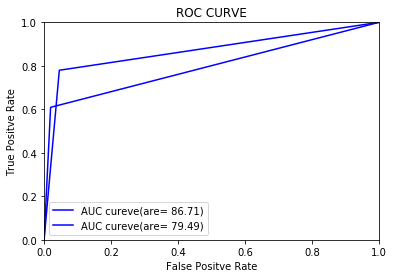

In [25]:
models=[LR,RFC]
for a in models:
    a.fit(x_train,y_train)
    predict=a.predict(x_test)
    Accuracy=accuracy_score(y_test,predict)
    f1=f1_score(y_test,predict)
    cm=confusion_matrix(y_test,predict)
    cr=classification_report(y_test,predict)

    
    
    print(a)
    print("Accuracy",Accuracy)
    print("f1 Score",f1)

    print(cm)
    print(cr)
    fpr,tpr,thresh=roc_curve(y_test,predict)
    plt.plot(fpr,tpr,color='blue',label="AUC cureve(are= %0.2f)" %round(auc(fpr,tpr)*100,2))
    plt.xlabel("False Positve Rate")
    plt.ylabel("True Positve Rate")
    plt.title("ROC CURVE",)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.legend()



    

In [26]:
# creating word_count vectorized data using count vectorizer
wc_vectorizer = CountVectorizer(binary=False)
wc_vectorizer.fit(lemmatized_tweets)
X_word_count = wc_vectorizer.transform(lemmatized_tweets)

In [27]:
x_train_wc, x_test_wc, y_train_wc, y_test_wc = train_test_split(X_word_count, y, train_size = 0.75)

C:\Users\Travealone\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy 0.886885524749107
f1 Score 0.7983014861995754
[[3898  274]
 [ 391 1316]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4172
           1       0.83      0.77      0.80      1707

    accuracy                           0.89      5879
   macro avg       0.87      0.85      0.86      5879
weighted avg       0.89      0.89      0.89      5879

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples

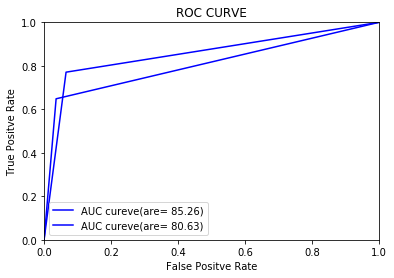

In [28]:
models=[LR,RFC]
for a in models:
    a.fit(x_train_wc,y_train_wc)
    predict=a.predict(x_test_wc)
    Accuracy=accuracy_score(y_test_wc,predict)
    f1=f1_score(y_test_wc,predict)
    cm=confusion_matrix(y_test_wc,predict)
    cr=classification_report(y_test_wc,predict)

    
    
    print(a)
    print("Accuracy",Accuracy)
    print("f1 Score",f1)

    print(cm)
    print(cr)
    fpr,tpr,thresh=roc_curve(y_test_wc,predict)
    plt.plot(fpr,tpr,color='blue',label="AUC cureve(are= %0.2f)" %round(auc(fpr,tpr)*100,2))
    plt.xlabel("False Positve Rate")
    plt.ylabel("True Positve Rate")
    plt.title("ROC CURVE",)
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.legend()